## Machine Learning Online Class - Exercise 2: Logistic Regression

## 1. Logistic Regression
## Part 1: Initialization

In [1]:
import numpy as np
import pandas as pd # 读取数据到DataFrame
from matplotlib import pyplot as plt
# 在notebook中显示绘图结果
%matplotlib inline

# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib
# 设置图片尺寸 14" x 7"
# rc: resource configuration   资源配置
matplotlib.rc('figure', figsize = (14, 7))
# 设置字体 14
matplotlib.rc('font', size = 14)
# 不显示顶部和右侧的坐标线
matplotlib.rc('axes.spines', top = False, right = False)
# 不显示网格
matplotlib.rc('axes', grid = False)
# 设置背景颜色是白色
matplotlib.rc('axes', facecolor = 'white')

names1 = ['Exam 1','Exam 2','Admitted']
data1 = pd.read_csv('ex2data1.txt',header = None,names = names1)
X = data1[['Exam 1','Exam 2']]
y = data1[['Admitted']]
data1.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Part 2: Plotting - Visualizing the data

In [2]:
# Method 1
def plotData(X, y):
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.

# Instructions: Plot the positive and negative examples on a
#               2D plot, using the option 'k+' for the positive
#               examples and 'ko' for the negative examples.

    # Find Indices of Positive and Negative Examples
    pos = y.Admitted==1
    neg = y.Admitted==0

    # Plot Examples
    plt.plot(X[pos]['Exam 1'] , X[pos]['Exam 2'] , 'k+' )
    plt.plot(X[neg]['Exam 1'] , X[neg]['Exam 2'] , 'ko' )
    # Labels and Legend
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])

# Method 2
def plotData2(data):
    positive = data[data['Admitted'].isin([1])]  
    negative = data[data['Admitted'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8))  
    ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
    ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
    ax.legend()  
    ax.set_xlabel('Exam 1 Score')  
    ax.set_ylabel('Exam 2 Score')  

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



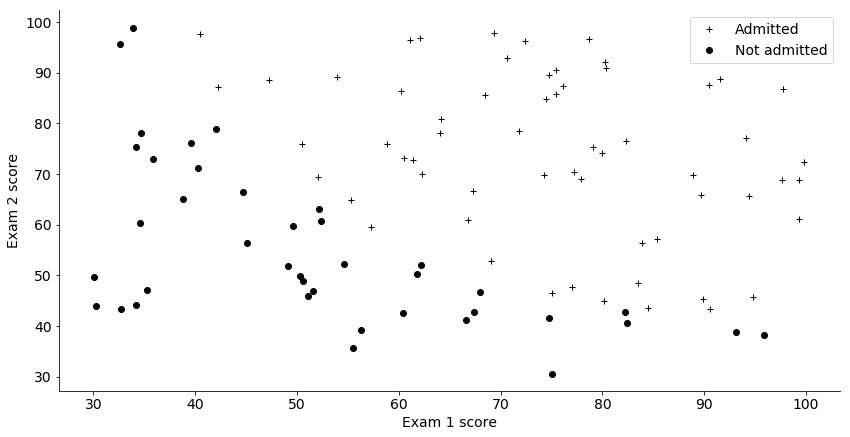

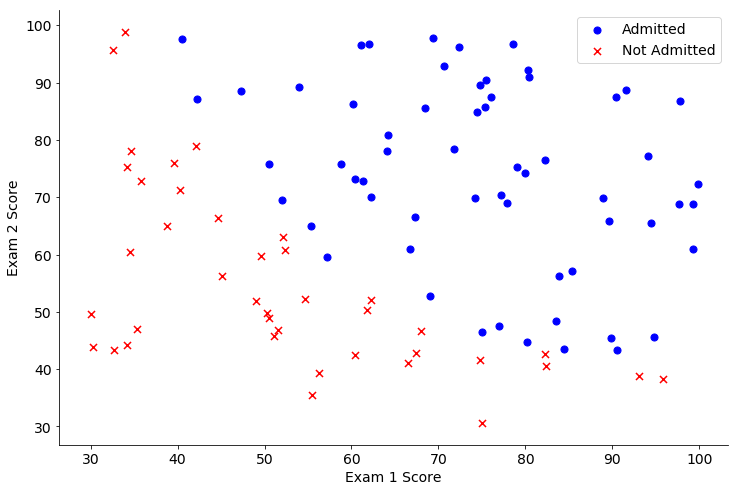

In [3]:
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
plotData(X, y)
plotData2(data1)

y## Part 2: Compute Cost and Gradient

### Sigmoid function
This function is the “activation” function for the output of logistic regression. It converts a continuous input into a value between zero and one. This value can be interpreted as the class probability, or the likelihood that the input example should be classified positively.

Recall that the logistic regression hypothesis is defined as:
$$h_\theta(x) = g(\theta^Tx)\,.$$
The sigmoid function is defined as:
$$g(z) = \frac{1}{1+e^z}\,.$$

In [4]:
def sigmoid(z):
# SIGMOID Compute sigmoid functoon
#   J = SIGMOID(z) computes the sigmoid of z.
    g = np.zeros(z.shape[0])
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar).
    g = 1 / (1 + np.exp(-z))
    return g

Using this probability along with a threshold value, we can obtain a discrete label prediction. It helps to visualize the function’s output to see what it’s really doing.

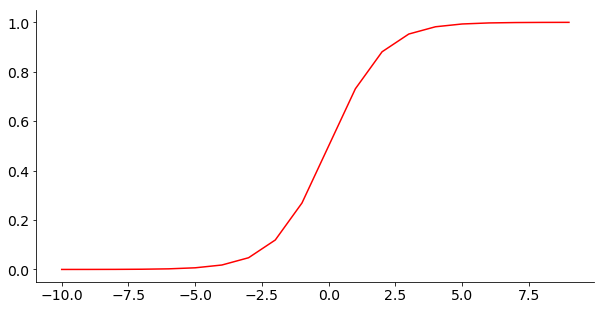

In [5]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(10,5))  
ax.plot(nums, sigmoid(nums), 'r')

### Cost function and gradient

In this part of the exercise, you will implement the cost and gradient for logistic regression.

COSTFUNCTION Compute cost and gradient for logistic regression

Remember that the cost function evaluates the performance of the model on the training data given a set of model parameters. Here’s the cost function for logistic regression.

Recall that the cost function in logistic regression is
$$ J(\theta) = \frac{1}{m}\sum^{m}_{i=1}[-y^{i}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]\,, $$
and the gradient of the cost is a vector $\theta$ where the $j^{th}$ element (for $j=0,1,2,...,n$) is defined as follows:
    $$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}.$$

In [6]:
def costFunction(theta, X, y):
#   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
#   parameter for logistic regression and the gradient of the cost
#   w.r.t. to the parameters.

    # Initialize some useful values
    m = len(y) # number of training examples
    J = 0
    grad = np.zeros((theta.shape[0],1))
    
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    # Note: grad should have the same dimensions as theta
    #=====================Compute J====================
    H = sigmoid(X.dot(theta))
    T = np.array(y) * np.log(H) + (1 - np.array(y)) * np.log(1 - H)
    J = -1/m*np.sum(T)
    #====================Compute grad==================
    for i in range(m):
        grad = grad + (H.iloc[i,0] - y.iloc[i,0]) * np.array([X.iloc[i]]).T
    grad = 1/m*grad
    return J,grad

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [7]:
# add a ones column - this makes the matrix multiplication work out easier
data1.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data1.shape[1]
X0 = data1.iloc[:,0:cols-1]
y0 = data1.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X0 = np.array(X0.values)
y0 = np.array(y0.values)
theta0 = np.zeros(3)

In [8]:
# compute the cost for our initial solution given zeros for the model parameters
cost(theta0, X0, y0)  

0.69314718055994529

对比，NG的Octave版本：

In [9]:
#  Setup the data matrix appropriately, and add ones for the intercept term
[m,n] = X.shape

# Add intercept term to x and X_test
df1 = pd.DataFrame(np.array([np.ones((m))]).T)
X = pd.concat([df1,X],axis=1)

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
[cost0,grad] = costFunction(initial_theta,X,y)
print('Cost at initial theta (zeros): %f' %cost0)
print('Gradient at initial theta (zeros): ')
print(' %f \n %f \n %f' %(grad[0],grad[1],grad[2]))

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842


## Part 3: Optimizing using SciPy （like Octave's fminunc）

In [10]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

Note that we don't actually perform gradient descent in this function - we just compute a single gradient step. In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients. Since we're using Python, we can use SciPy's optimization API to do the same thing.

In [11]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta0, fprime=gradient, args=(X0, y0))  
cost(result[0], X0, y0)

# Print theta to screen
print('Cost at theta found by opt.fmin_tnc: \n', cost(result[0], X0, y0))
print('theta:')
print(' %f \n %f \n %f' %(result[0][0],result[0][1],result[0][2]))

Cost at theta found by opt.fmin_tnc: 
 0.203497701589
theta:
 -25.161319 
 0.206232 
 0.201471


In [12]:
help(opt.fmin_tnc)

Help on function fmin_tnc in module scipy.optimize.tnc:

fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)
    Minimize a function with variables subject to bounds, using
    gradient information in a truncated Newton algorithm. This
    method wraps a C implementation of the algorithm.
    
    Parameters
    ----------
    func : callable ``func(x, *args)``
        Function to minimize.  Must do one of:
    
        1. Return f and g, where f is the value of the function and g its
           gradient (a list of floats).
    
        2. Return the function value but supply gradient function
           separately as `fprime`.
    
        3. Return the function value and set ``approx_grad=True``.
    
        If the function returns None, the minimization
        is aborted.
    x0 : arra

## Part 4: Predict and Accuracies

In [13]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X0)  

# Compute accuracy on our training set
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y0)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('Train accuracy = {0}%'.format(accuracy))

prob = sigmoid(np.array([[1,45,85]]) * theta_min.T)
print('For a student with scores 45 and 85, we predict an admission probability of ', prob);

# Plot Boundary
#plotDecisionBoundary(theta, X, y);

Train accuracy = 89%
For a student with scores 45 and 85, we predict an admission probability of  [[ 0.77629062]]


# Regularized Logistic Regression

Now that we have a working implementation of logistic regression, we'll going to improve the algorithm by adding regularization. Regularization is a term in the cost function that causes the algorithm to prefer "simpler" models (in this case, models will smaller coefficients). The theory is that this helps to minimize overfitting and improve the model's ability to generalize. We’ll apply our regularized version of logistic regression to a slightly more challenging problem. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a data set of test results on past microchips, from which you can build a logistic regression model.

Let's start by visualizing the data.

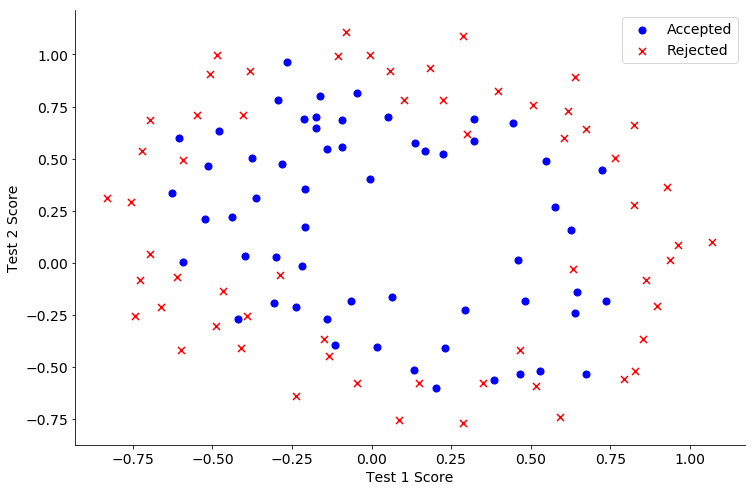

In [16]:
names2 = ['Test 1', 'Test 2', 'Accepted']
data2 = pd.read_csv('ex2data2.txt',header = None,names = names2)

positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')  

This data looks a bit more complicated than the previous example. In particular, you'll notice that there is no linear decision boundary that will perform well on this data. One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. We can try creating a bunch of polynomial features to feed into the classifier.

In [18]:
degree = 5  
x1 = data2['Test 1']  
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)  
data2.drop('Test 2', axis=1, inplace=True)

data2.head()  

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


Now we need to modify the cost and gradient functions to include the regularization term. In each case, the regularizer is added on to the previous calculation. Here’s the updated cost function.

In [19]:
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

Notice that we’ve added a new variable called “reg” that is a function of the parameter values. As the parameters get larger, the penalization added to the cost function increases. Also note that we’ve added a new “learning rate” parameter to the function. This is also part of the regularization term in the equation. The learning rate gives us a new hyper-parameter that we can use to tune how much weight the regularization holds in the cost function.

Next we’ll add regularization to the gradient function.

In [20]:
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

Just as with the cost function, the regularization term is added on to the original calculation. However, unlike the cost function, we included logic to make sure that the first parameter is not regularized. The intuition behind this decision is that the first parameter is considered the “bias” or “intercept” of the model and shouldn’t be penalized.

We can test out the new functions just as we did before.

In [21]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]  
X2 = data2.iloc[:,1:cols]  
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)  
y2 = np.array(y2.values)  
theta2 = np.zeros(11)

learningRate = 1

costReg(theta2, X2, y2, learningRate)  

0.6931471805599454

We can also re-use the optimization code from earlier to find the optimal model parameters.

In [22]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))  
result2  

(array([  1.22702519e-04,   7.19894617e-05,  -3.74156201e-04,
         -1.44256427e-04,   2.93165088e-05,  -5.64160786e-05,
         -1.02826485e-04,  -2.83150432e-04,   6.47297947e-07,
         -1.99697568e-04,  -1.68479583e-05]), 96, 1)

In [24]:
theta_min = np.matrix(result2[0])  
predictions = predict(theta_min, X2)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('accuracy = {0}%'.format(accuracy))

accuracy = 77%


That's all for part 3! In the next post in the series we'll expand on our implementation of logistic regression to tackle multi-class image classification.